# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
from ddpg_agent import Agent
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [3]:
env = UnityEnvironment(file_name="Tennis_Linux_NoVis/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
# set agent
agent = Agent(state_size=state_size, action_size=action_size, random_seed=2)

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [6]:
# for i in range(1, 6):                                      # play game for 5 episodes
#     env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#     states = env_info.vector_observations                  # get the current state (for each agent)
#     scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#     while True:
#         actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#         actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#         env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#         next_states = env_info.vector_observations         # get next state (for each agent)
#         rewards = env_info.rewards                         # get reward (for each agent)
#         dones = env_info.local_done                        # see if episode finished
#         scores += env_info.rewards                         # update the score (for each agent)
#         states = next_states                               # roll over states to next time step
#         if np.any(dones):                                  # exit loop if episode finished
#             break
#     print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

When finished, you can close the environment.

### 3. Train the agent with actor critic DDPG

Episode 1	Score: 0.00	Average Score: 0.00	Noise: 2.98
Episode 2	Score: 0.00	Average Score: 0.00	Noise: 2.97
Episode 3	Score: 0.00	Average Score: 0.00	Noise: 2.96
Episode 4	Score: 0.00	Average Score: 0.00	Noise: 2.94
Episode 5	Score: 0.00	Average Score: 0.00	Noise: 2.93
Episode 6	Score: 0.00	Average Score: 0.00	Noise: 2.91
Episode 7	Score: 0.00	Average Score: 0.00	Noise: 2.90
Episode 8	Score: 0.00	Average Score: 0.00	Noise: 2.88
Episode 9	Score: 0.00	Average Score: 0.00	Noise: 2.87
Episode 10	Score: 0.00	Average Score: 0.00	Noise: 2.85
Episode 11	Score: 0.00	Average Score: 0.00	Noise: 2.84
Episode 12	Score: 0.00	Average Score: 0.00	Noise: 2.82
Episode 13	Score: 0.09	Average Score: 0.01	Noise: 2.81
Episode 14	Score: 0.00	Average Score: 0.01	Noise: 2.80
Episode 15	Score: 0.00	Average Score: 0.01	Noise: 2.78
Episode 16	Score: 0.00	Average Score: 0.01	Noise: 2.77
Episode 17	Score: 0.00	Average Score: 0.01	Noise: 2.75
Episode 18	Score: 0.00	Average Score: 0.01	Noise: 2.74
Episode 19	Score: 0

Episode 149	Score: 0.00	Average Score: 0.00	Noise: 1.42
Episode 150	Score: 0.00	Average Score: 0.00	Noise: 1.41
Episode 151	Score: 0.09	Average Score: 0.00	Noise: 1.41
Episode 152	Score: 0.00	Average Score: 0.00	Noise: 1.40
Episode 153	Score: 0.00	Average Score: 0.00	Noise: 1.39
Episode 154	Score: 0.00	Average Score: 0.00	Noise: 1.39
Episode 155	Score: 0.00	Average Score: 0.00	Noise: 1.38
Episode 156	Score: 0.00	Average Score: 0.00	Noise: 1.37
Episode 157	Score: 0.00	Average Score: 0.00	Noise: 1.37
Episode 158	Score: 0.00	Average Score: 0.00	Noise: 1.36
Episode 159	Score: 0.00	Average Score: 0.00	Noise: 1.35
Episode 160	Score: 0.20	Average Score: 0.00	Noise: 1.35
Episode 161	Score: 0.00	Average Score: 0.00	Noise: 1.34
Episode 162	Score: 0.10	Average Score: 0.00	Noise: 1.33
Episode 163	Score: 0.00	Average Score: 0.00	Noise: 1.33
Episode 164	Score: 0.00	Average Score: 0.00	Noise: 1.32
Episode 165	Score: 0.00	Average Score: 0.00	Noise: 1.31
Episode 166	Score: 0.00	Average Score: 0.00	Nois

Episode 295	Score: 0.00	Average Score: 0.03	Noise: 0.68
Episode 296	Score: 0.00	Average Score: 0.03	Noise: 0.68
Episode 297	Score: 0.09	Average Score: 0.03	Noise: 0.68
Episode 298	Score: 0.00	Average Score: 0.02	Noise: 0.67
Episode 299	Score: 0.00	Average Score: 0.02	Noise: 0.67
Episode 300	Score: 0.10	Average Score: 0.02	Noise: 0.67
Episode 300	Average Score: 0.02
Episode 301	Score: 0.00	Average Score: 0.02	Noise: 0.66
Episode 302	Score: 0.00	Average Score: 0.02	Noise: 0.66
Episode 303	Score: 0.00	Average Score: 0.02	Noise: 0.66
Episode 304	Score: 0.00	Average Score: 0.02	Noise: 0.65
Episode 305	Score: 0.00	Average Score: 0.02	Noise: 0.65
Episode 306	Score: 0.00	Average Score: 0.02	Noise: 0.65
Episode 307	Score: 0.00	Average Score: 0.02	Noise: 0.64
Episode 308	Score: 0.00	Average Score: 0.02	Noise: 0.64
Episode 309	Score: 0.00	Average Score: 0.02	Noise: 0.64
Episode 310	Score: 0.00	Average Score: 0.02	Noise: 0.63
Episode 311	Score: 0.00	Average Score: 0.02	Noise: 0.63
Episode 312	Scor

Episode 441	Score: 0.20	Average Score: 0.07	Noise: 0.33
Episode 442	Score: 0.00	Average Score: 0.07	Noise: 0.33
Episode 443	Score: 0.00	Average Score: 0.07	Noise: 0.33
Episode 444	Score: 0.10	Average Score: 0.07	Noise: 0.32
Episode 445	Score: 0.00	Average Score: 0.07	Noise: 0.32
Episode 446	Score: 0.10	Average Score: 0.07	Noise: 0.32
Episode 447	Score: 0.00	Average Score: 0.07	Noise: 0.32
Episode 448	Score: 0.10	Average Score: 0.07	Noise: 0.32
Episode 449	Score: 0.10	Average Score: 0.07	Noise: 0.32
Episode 450	Score: 0.10	Average Score: 0.07	Noise: 0.31
Episode 451	Score: 0.00	Average Score: 0.07	Noise: 0.31
Episode 452	Score: 0.10	Average Score: 0.07	Noise: 0.31
Episode 453	Score: 0.00	Average Score: 0.07	Noise: 0.31
Episode 454	Score: 0.20	Average Score: 0.07	Noise: 0.31
Episode 455	Score: 0.10	Average Score: 0.07	Noise: 0.31
Episode 456	Score: 0.09	Average Score: 0.07	Noise: 0.31
Episode 457	Score: 0.10	Average Score: 0.07	Noise: 0.30
Episode 458	Score: 0.10	Average Score: 0.07	Nois

Episode 587	Score: 0.10	Average Score: 0.08	Noise: 0.16
Episode 588	Score: 0.00	Average Score: 0.08	Noise: 0.16
Episode 589	Score: 0.20	Average Score: 0.08	Noise: 0.16
Episode 590	Score: 0.10	Average Score: 0.08	Noise: 0.16
Episode 591	Score: 0.10	Average Score: 0.08	Noise: 0.16
Episode 592	Score: 0.10	Average Score: 0.08	Noise: 0.15
Episode 593	Score: 0.10	Average Score: 0.08	Noise: 0.15
Episode 594	Score: 0.10	Average Score: 0.08	Noise: 0.15
Episode 595	Score: 0.10	Average Score: 0.08	Noise: 0.15
Episode 596	Score: 0.10	Average Score: 0.08	Noise: 0.15
Episode 597	Score: 0.10	Average Score: 0.08	Noise: 0.15
Episode 598	Score: 0.20	Average Score: 0.08	Noise: 0.15
Episode 599	Score: 0.10	Average Score: 0.08	Noise: 0.15
Episode 600	Score: 0.10	Average Score: 0.08	Noise: 0.15
Episode 600	Average Score: 0.08
Episode 601	Score: 0.10	Average Score: 0.08	Noise: 0.15
Episode 602	Score: 0.00	Average Score: 0.08	Noise: 0.15
Episode 603	Score: 0.10	Average Score: 0.08	Noise: 0.15
Episode 604	Scor

Episode 733	Score: 0.10	Average Score: 0.11	Noise: 0.08
Episode 734	Score: 0.20	Average Score: 0.11	Noise: 0.08
Episode 735	Score: 0.10	Average Score: 0.11	Noise: 0.08
Episode 736	Score: 0.10	Average Score: 0.11	Noise: 0.07
Episode 737	Score: 0.10	Average Score: 0.11	Noise: 0.07
Episode 738	Score: 0.10	Average Score: 0.11	Noise: 0.07
Episode 739	Score: 0.10	Average Score: 0.11	Noise: 0.07
Episode 740	Score: 0.10	Average Score: 0.11	Noise: 0.07
Episode 741	Score: 0.10	Average Score: 0.11	Noise: 0.07
Episode 742	Score: 0.10	Average Score: 0.11	Noise: 0.07
Episode 743	Score: 0.10	Average Score: 0.11	Noise: 0.07
Episode 744	Score: 0.19	Average Score: 0.11	Noise: 0.07
Episode 745	Score: 0.30	Average Score: 0.11	Noise: 0.07
Episode 746	Score: 0.10	Average Score: 0.11	Noise: 0.07
Episode 747	Score: 0.10	Average Score: 0.11	Noise: 0.07
Episode 748	Score: 0.20	Average Score: 0.11	Noise: 0.07
Episode 749	Score: 0.10	Average Score: 0.11	Noise: 0.07
Episode 750	Score: 0.10	Average Score: 0.11	Nois

Episode 879	Score: 0.00	Average Score: 0.16	Noise: 0.04
Episode 880	Score: 0.10	Average Score: 0.16	Noise: 0.04
Episode 881	Score: 0.10	Average Score: 0.16	Noise: 0.04
Episode 882	Score: 0.10	Average Score: 0.16	Noise: 0.04
Episode 883	Score: 0.10	Average Score: 0.16	Noise: 0.04
Episode 884	Score: 0.10	Average Score: 0.16	Noise: 0.04
Episode 885	Score: 0.00	Average Score: 0.16	Noise: 0.04
Episode 886	Score: 0.00	Average Score: 0.16	Noise: 0.04
Episode 887	Score: 0.20	Average Score: 0.16	Noise: 0.04
Episode 888	Score: 0.10	Average Score: 0.16	Noise: 0.03
Episode 889	Score: 0.10	Average Score: 0.16	Noise: 0.03
Episode 890	Score: 0.10	Average Score: 0.16	Noise: 0.03
Episode 891	Score: 0.10	Average Score: 0.16	Noise: 0.03
Episode 892	Score: 0.10	Average Score: 0.15	Noise: 0.03
Episode 893	Score: 0.10	Average Score: 0.15	Noise: 0.03
Episode 894	Score: 0.10	Average Score: 0.15	Noise: 0.03
Episode 895	Score: 0.30	Average Score: 0.16	Noise: 0.03
Episode 896	Score: 0.10	Average Score: 0.16	Nois

Episode 1024	Score: 0.49	Average Score: 0.16	Noise: 0.02
Episode 1025	Score: 0.10	Average Score: 0.16	Noise: 0.02
Episode 1026	Score: 0.10	Average Score: 0.16	Noise: 0.02
Episode 1027	Score: 0.70	Average Score: 0.17	Noise: 0.02
Episode 1028	Score: 0.10	Average Score: 0.17	Noise: 0.02
Episode 1029	Score: 0.20	Average Score: 0.17	Noise: 0.02
Episode 1030	Score: 0.30	Average Score: 0.17	Noise: 0.02
Episode 1031	Score: 0.10	Average Score: 0.17	Noise: 0.02
Episode 1032	Score: 0.20	Average Score: 0.17	Noise: 0.02
Episode 1033	Score: 0.20	Average Score: 0.17	Noise: 0.02
Episode 1034	Score: 0.50	Average Score: 0.17	Noise: 0.02
Episode 1035	Score: 0.20	Average Score: 0.17	Noise: 0.02
Episode 1036	Score: 0.30	Average Score: 0.18	Noise: 0.02
Episode 1037	Score: 0.50	Average Score: 0.18	Noise: 0.02
Episode 1038	Score: 0.40	Average Score: 0.18	Noise: 0.02
Episode 1039	Score: 0.10	Average Score: 0.18	Noise: 0.02
Episode 1040	Score: 0.10	Average Score: 0.18	Noise: 0.02
Episode 1041	Score: 0.49	Averag

Episode 1168	Score: 0.50	Average Score: 0.22	Noise: 0.01
Episode 1169	Score: 0.50	Average Score: 0.22	Noise: 0.01
Episode 1170	Score: 0.10	Average Score: 0.22	Noise: 0.01
Episode 1171	Score: 0.20	Average Score: 0.22	Noise: 0.01
Episode 1172	Score: 0.60	Average Score: 0.23	Noise: 0.01
Episode 1173	Score: 0.10	Average Score: 0.22	Noise: 0.01
Episode 1174	Score: 0.20	Average Score: 0.23	Noise: 0.01
Episode 1175	Score: 0.70	Average Score: 0.23	Noise: 0.01
Episode 1176	Score: 0.20	Average Score: 0.23	Noise: 0.01
Episode 1177	Score: 0.20	Average Score: 0.23	Noise: 0.01
Episode 1178	Score: 0.20	Average Score: 0.23	Noise: 0.01
Episode 1179	Score: 0.20	Average Score: 0.23	Noise: 0.01
Episode 1180	Score: 0.30	Average Score: 0.23	Noise: 0.01
Episode 1181	Score: 0.00	Average Score: 0.23	Noise: 0.01
Episode 1182	Score: 0.60	Average Score: 0.24	Noise: 0.01
Episode 1183	Score: 0.50	Average Score: 0.24	Noise: 0.01
Episode 1184	Score: 0.20	Average Score: 0.24	Noise: 0.01
Episode 1185	Score: 0.10	Averag

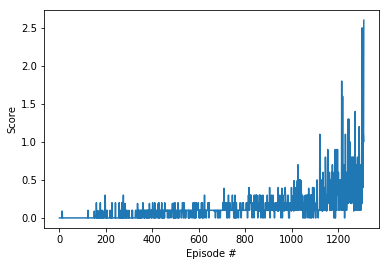

In [7]:
def ddpg(n_episodes=2000, max_t=1000, print_every=100):
    """ Deep Deterministic Policy Gradients
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    """
    scores_window = deque(maxlen=print_every)
    scores = np.zeros(num_agents)
    scores_episode = []
    decreasing_noise = 3
    noise_discount = 0.995
    agents =[] 
    # init all agents
    for i in range(num_agents):
        agents.append(Agent(state_size, action_size, random_seed=0))
    # loop throught episodes
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        # reset all agents after each episode
        for agent in agents:
            agent.reset()
        decreasing_noise *= noise_discount
        scores = np.zeros(num_agents)
        # loop through all timesteps   
        for t in range(max_t):
            actions = np.array([agents[i].act(states[i],decreasing_noise) for i in range(num_agents)])
            env_info = env.step(actions)[brain_name]        # send the action to the environment
            next_states = env_info.vector_observations     # get the next state
            rewards = env_info.rewards                     # get the reward
            dones = env_info.local_done        
            
            for i in range(num_agents):
                agents[i].step(states[i], actions[i], rewards[i], next_states[i], dones[i]) 
 
            states = next_states
            scores += rewards
            if np.any(dones):
                break 
        score = np.max(scores)
        scores_window.append(score)       # save most recent score
        scores_episode.append(score)
        print('\rEpisode {}\tScore: {:.2f}\tAverage Score: {:.2f}\tNoise: {:.2f}'.format(i_episode, score, np.mean(scores_window),decreasing_noise), end="\n")
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agents[0].actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agents[0].critic_local.state_dict(), 'checkpoint_critic.pth')
            break
            
    return scores_episode

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch the agent play

In [8]:
from model import Actor, Critic
scores = np.zeros(num_agents)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
agents = []
for i in range(num_agents):
    agents.append(Agent(state_size, action_size, random_seed=0))
random_seed=0
agents[0].actor_local = Actor(state_size, action_size, random_seed).to(device)
agents[0].actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agents =[] 

for i in range(num_agents):
    agents.append(Agent(state_size, action_size, random_seed=0))
    

while True:
    actions = np.array([agents[i].act(states[i]) for i in range(num_agents)])

    env_info = env.step(actions)[brain_name]        # send the action to the environment
    next_states = env_info.vector_observations     # get the next state
    rewards = env_info.rewards                     # get the reward
    dones = env_info.local_done        

    states = next_states
    scores += rewards

    print('\rScore: {:.2f}\tmin: {:.2f}\tmax: {:.2f}'
              .format(np.mean(scores), np.min(scores), np.max(scores)), end="") 
    
    if np.any(dones):
        break
        
print("\nScores: {}".format(scores))

Score: 0.00	min: 0.00	max: 0.00
Scores: [0. 0.]


In [9]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```